<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part b: Distance and the Curse of Dimensionality DEMO


Estimated time needed: **45** minutes


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Curse of Dimensionality 

### DEMO objectives: 
* Gain understanding of why observations are far apart in high-dimensional space
* See an example of how adding dimensions degrades model performance for classification
* Learn how to fight the curse of dimensionality in your modeling projects

-----

### In high-dimensional space, points tend to be far apart.
This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other: If my next nearest neighbor is very far away, does it still make sense to call it my neighbor? This notebook will show why high-dimensional space leads to sparse data. 


### A circle inside a square 

Let's start by drawing a unit circle inside of a square. 


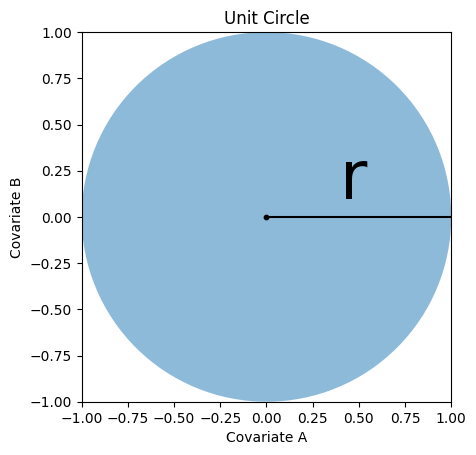

In [ ]:
# Hàm vẽ hình tròn đơn vị minh họa mối quan hệ giữa hai biến Covariate A và B
def make_circle(point=0):
    # Lấy figure hiện tại
    fig = plt.gcf()
    
    # Thêm trục tọa độ với tỷ lệ bằng nhau (hình tròn không bị méo)
    ax = fig.add_subplot(111, aspect='equal')
    
    # Thêm hình tròn bán kính 1, tâm tại (0,0)
    fig.gca().add_artist(plt.Circle((0, 0), 1, alpha=.5))
    
    # Vẽ điểm gốc (0,0)
    ax.scatter(0, 0, s=10, color="black")
    
    # Vẽ đoạn thẳng biểu diễn bán kính r
    ax.plot(np.linspace(0, 1, 100), np.zeros(100), color="black")
    
    # Thêm nhãn 'r' vào bán kính
    ax.text(.4, .1, "r", size=48)
    
    # Giới hạn trục x và y để hiển thị tròn đều
    ax.set_xlim(left=-1, right=1)
    ax.set_ylim(bottom=-1, top=1)
    
    # Gán nhãn cho hai trục
    plt.xlabel("Covariate A")
    plt.ylabel("Covariate B")
    
    # Tiêu đề hình
    plt.title("Unit Circle")
    
    # Nếu tham số point = 1 → vẽ thêm điểm “Far away” nằm ngoài đường tròn
    if point:
        ax.text(.55, .9, "Far away", color="purple")
        ax.scatter(.85, .85, s=10, color="purple")
    else:
        # Nếu point = 0 → chỉ hiển thị hình tròn cơ bản
        plt.show()

# Gọi hàm để vẽ hình tròn đơn vị
make_circle()


Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean. 


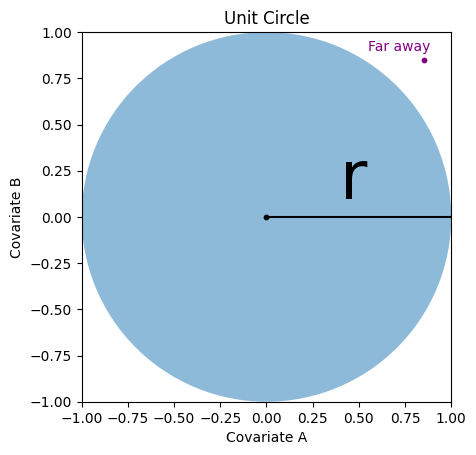

In [4]:
make_circle(1)

### How much of the square is outside the circle? And the cube outside the sphere, etc.

We've concluded that our purple point above would be hard to classify because it's far away from the rest of our observations. But what percentage of our points in the square are outside of the circle, and thus "far away"? Let's do some math!

Since the square has length $2r$ and area $(2r)^2$, the percentage of the square outside the circle is:  1 - $\frac {\pi r^2} {(2r)^2} = 1 - \frac \pi 4$ = ~ 21% 

But what about a cube? To illustrate, we will use [matplotlib's 3-D axis](https://matplotlib.org/3.2.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) which allows the '3d' projection, as well as the [itertools](https://docs.python.org/3/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) library, which offers a number of efficient tools for looping and combining lists. We will use the [product](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.product) (cartesian product) and [combinations](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.combinations) (unique subsequences) functions. 


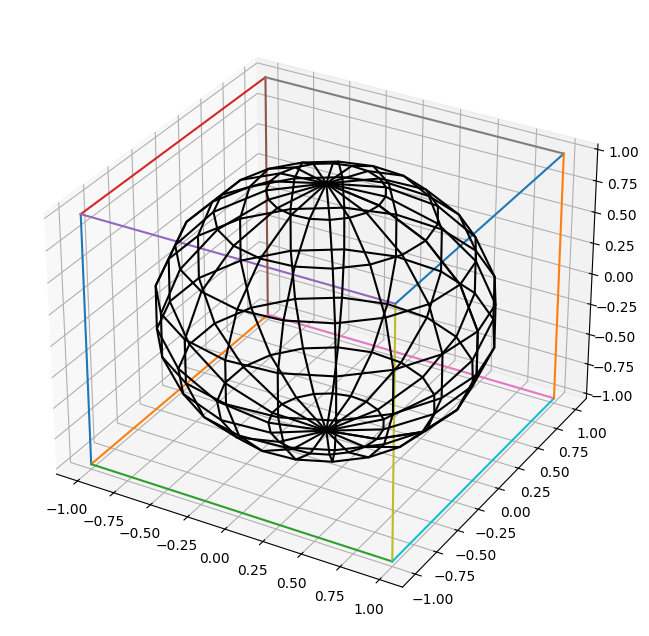

In [ ]:
# Import các thư viện cần thiết
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

# Tạo figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# Vẽ khối lập phương
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s - e)) == r[1] - r[0]:
        ax.plot3D(*zip(s, e))

# Vẽ mặt cầu trên cùng hệ trục
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black")

plt.show()


The volume of the sphere is given by the forumula: $\frac{4}{3} \pi r^3$, and since the cube has a radius of $2r$, it has volume $(2r)^3$. 

This allows us to calculate the percent of the cube's volume that's outside of the sphere: 1- $\frac {\frac 4 3 \pi r^3} {(2r)^3} = 1 - \frac \pi 6$ = ~ 48%

### Can we generalize to more than three dimensions? 

Let's draw a bunch of random points from a 0-1 distribution, then measure how far away from the origin they are. 


In [ ]:
# Vẽ 5 điểm dữ liệu ngẫu nhiên trong không gian 2 chiều
sample_data = np.random.sample((5, 2))
print("Sample data:\n", sample_data, '\n')

def norm(x):
    '''Tính khoảng cách của mỗi điểm đến gốc tọa độ (0,0)'''
    return np.sqrt((x**2).sum(1))  # Tổng bình phương theo trục 1, rồi lấy căn bậc 2

def in_the_ball(x):
    '''Xác định xem điểm có nằm trong hình tròn đơn vị (bán kính = 1) hay không'''
    return norm(x) < 1  # Trả về True nếu nằm trong vòng tròn

# In ra kết quả: độ dài vector và xem có nằm trong vòng tròn không
for x, y in zip(norm(sample_data), in_the_ball(sample_data)):
    print("Norm =", x.round(2), "; is in circle?", y)


Sample data:
 [[0.26165062 0.48604019]
 [0.79115682 0.92332391]
 [0.62062483 0.77194717]
 [0.89597171 0.18888735]
 [0.39608928 0.14049157]] 

Norm =  0.55 ; is in circle?  True
Norm =  1.22 ; is in circle?  False
Norm =  0.99 ; is in circle?  True
Norm =  0.92 ; is in circle?  True
Norm =  0.42 ; is in circle?  True


Can we generalize beyond two dimensions? 


In [8]:
# Hàm ước lượng tỷ lệ thể tích hình cầu n-chiều (n-ball) nằm trong hình lập phương n-chiều (n-cube)
def what_percent_of_the_ncube_is_in_the_nball(d_dim, sample_size=10**4):
    # Tạo dữ liệu ngẫu nhiên: sample_size điểm trong không gian d_dim (mỗi tọa độ ∈ [0,1))
    shape = sample_size, d_dim
    
    # Lặp lại 100 lần: mỗi lần sinh ngẫu nhiên và tính phần trăm điểm nằm trong hình cầu đơn vị
    data = np.array([
        in_the_ball(np.random.sample(shape)).mean()
        for iteration in range(100)
    ])
    
    # Lấy trung bình phần trăm qua 100 lần lặp
    return data.mean()

# Xét các không gian từ 2D đến 14D
dims = range(2, 15)

# Tính phần trăm thể tích hình cầu đơn vị nằm trong hình lập phương đơn vị với từng số chiều
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball, dims)))

# In kết quả ra màn hình
for dim, percent in zip(dims, data):
    print("Dimension =", dim, "; percent in ball =", percent)


Dimension = 2 ; percent in ball = 0.7854859999999999
Dimension = 3 ; percent in ball = 0.5241340000000001
Dimension = 4 ; percent in ball = 0.30883499999999997
Dimension = 5 ; percent in ball = 0.16505899999999996
Dimension = 6 ; percent in ball = 0.08055100000000001
Dimension = 7 ; percent in ball = 0.037045
Dimension = 8 ; percent in ball = 0.015843999999999997
Dimension = 9 ; percent in ball = 0.006392
Dimension = 10 ; percent in ball = 0.0023989999999999997
Dimension = 11 ; percent in ball = 0.0009010000000000001
Dimension = 12 ; percent in ball = 0.0003260000000000001
Dimension = 13 ; percent in ball = 0.00011100000000000003
Dimension = 14 ; percent in ball = 3.8e-05


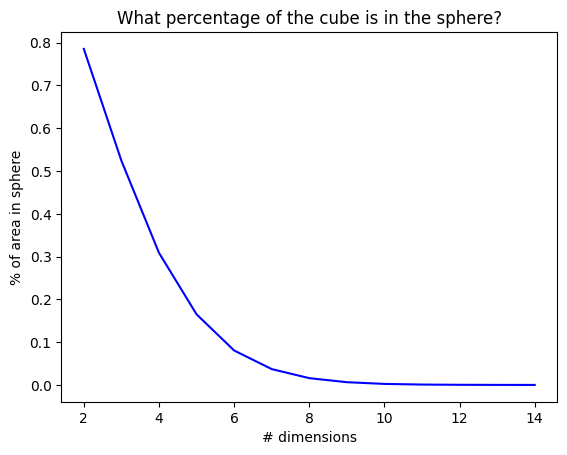

In [9]:
# Let's plot the above percentages 

plt.plot(dims, data, color='blue')
plt.xlabel("# dimensions")
plt.ylabel("% of area in sphere")
plt.title("What percentage of the cube is in the sphere?")
plt.show()

## Check for understanding

What happens to the percentage of the area in the sphere as we increase the number of dimensions? What does this mean about how the dispersion of our data? 

---


### Measuring the distance from the center of the cube to the nearest point

Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center. 

If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly. 


In [10]:
# Hàm lấy khoảng cách nhỏ nhất từ các điểm ngẫu nhiên đến gốc tọa độ
def get_min_distance(dimension, sample_size=10**3):
    '''
    Sinh ngẫu nhiên sample_size điểm trong không gian n-chiều
    Sau đó tìm khoảng cách nhỏ nhất từ các điểm đó đến gốc tọa độ (0,0,...,0)
    '''
    # Tạo các điểm ngẫu nhiên trong khoảng [-0.5, 0.5] để dữ liệu được "center" quanh gốc
    points = np.random.sample((sample_size, dimension)) - 0.5
    
    # Tính khoảng cách nhỏ nhất đến gốc
    return np.min(norm(points))


def estimate_closest(dimension):
    '''
    Với mỗi chiều, lặp 100 lần:
    - Sinh các điểm ngẫu nhiên và tính khoảng cách nhỏ nhất đến gốc.
    - Lưu kết quả các lần lặp lại.
    Trả về giá trị trung bình, nhỏ nhất và lớn nhất của khoảng cách nhỏ nhất.
    '''
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()


# Tính cho các không gian từ 2D đến 99D
dims = range(2, 100)
min_distance_data = np.array(list(map(estimate_closest, dims)))

# In kết quả thử nghiệm với không gian 6 chiều
print("For dimension 6:", estimate_closest(6))


For dimension 6: (0.21541016584942568, 0.06207409547329058, 0.3003861696929478)


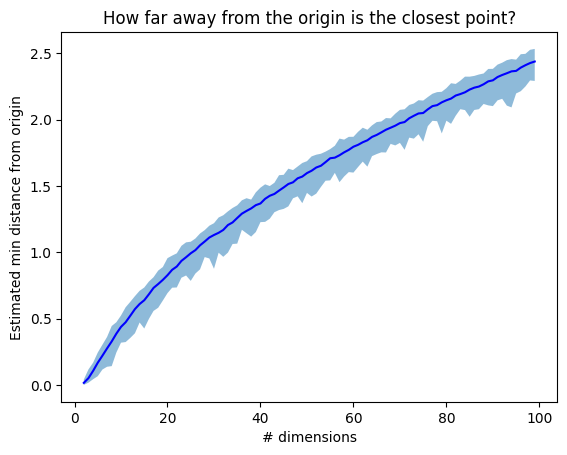

In [11]:
# Plot the min/max/mean of the closest point for each dimension using sampling 

plt.plot(dims,min_distance_data[:,0], color='blue')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("# dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away from the origin is the closest point?"); 

## Check for understanding

What would we have to do to get similar density of points as the low dimensions if we wanted to use higher dimensions of data? 

---


### How to fight the curse of dimensionality 

The curse of dimensionality is a common hurdle in real-world predictive modeling. We've already seen this in our bag-of-words approach to NLP. How can we create good models in cases where our data is of high dimensionality? 

* Feature selection: Use domain knowledge to reduce the number of features included in the model
* Feature extraction: Use dimensionality reduction techniques (e.g. PCA) to transform the raw data into a lower number of features that preserve (most of) the variability in the data

We'll talk more about PCA next.


## How does high dimensionality affect model performance?

We'll test model performance (classification accuracy) by creating some random data for classification, one set with a low number of features and another with a very high number of features. We'll then compare their performance using the same classification algorithm. 


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Tạo bộ dữ liệu có 2 đặc trưng (feature)
X, y = make_classification(
    n_features=2,           # Số đặc trưng (2 chiều)
    n_redundant=0,          # Không có đặc trưng dư thừa
    n_informative=2,        # Cả 2 đặc trưng đều có thông tin hữu ích
    random_state=1,         # Đặt seed để tái lập kết quả
    n_clusters_per_class=2  # Mỗi lớp có 2 cụm con
)

# Tạo nhiễu ngẫu nhiên để làm dữ liệu đa dạng hơn
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# Chuẩn hóa dữ liệu về phân phối chuẩn (mean = 0, std = 1)
X = StandardScaler().fit_transform(X)

# Chia dữ liệu thành tập huấn luyện (60%) và tập kiểm tra (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [14]:
DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [15]:
print("Score from two-feature classifier: ", score)

Score from two-feature classifier:  0.875


In [16]:
# Tạo bộ dữ liệu có 200 đặc trưng (feature)
X, y = make_classification(
    n_features=200,          # Tổng số đặc trưng
    n_redundant=0,           # Không có đặc trưng dư thừa
    n_informative=200,       # Tất cả các đặc trưng đều mang thông tin hữu ích
    random_state=1,          # Đặt seed để tái lập kết quả
    n_clusters_per_class=2   # Mỗi lớp có 2 cụm con
)

# Thêm nhiễu ngẫu nhiên để dữ liệu phức tạp hơn
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# Chuẩn hóa dữ liệu về phân phối chuẩn (mean = 0, std = 1)
X = StandardScaler().fit_transform(X)

# Chia dữ liệu thành tập huấn luyện (60%) và tập kiểm tra (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tạo mô hình Cây quyết định (Decision Tree)
DT = DecisionTreeClassifier()

# Huấn luyện mô hình trên tập huấn luyện
DT.fit(X_train, y_train)

# Tính độ chính xác của mô hình trên tập kiểm tra
score = DT.score(X_test, y_test)


In [17]:
print("Score from 200-feature classifier: ", score)

Score from 200-feature classifier:  0.475


Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data.


### Comparing accuracy of classification against number of features

Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance. 


In [18]:
# Danh sách lưu độ chính xác của mô hình với số lượng đặc trưng khác nhau
scores = []

# Thiết lập bước nhảy (increment) và số lượng đặc trưng tối đa
increment, max_features = 50, 4000

# Lặp qua các số lượng đặc trưng từ 50 → 4000, chia đều thành 50 mốc
for num in np.linspace(increment, max_features, increment, dtype='int'):
    
    # Tạo dữ liệu với số lượng đặc trưng = num, 3 lớp, 1 cụm cho mỗi lớp
    X, y = make_classification(
        n_features=num,
        n_redundant=0,
        random_state=1,
        n_clusters_per_class=1,
        n_classes=3
    )

    # Thêm nhiễu ngẫu nhiên để tăng độ phức tạp của dữ liệu
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)

    # Chuẩn hóa dữ liệu (mean = 0, std = 1)
    X = StandardScaler().fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện (60%) và kiểm tra (40%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Tạo và huấn luyện mô hình Decision Tree
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)

    # Tính độ chính xác và lưu vào danh sách
    scores.append(DT.score(X_test, y_test))


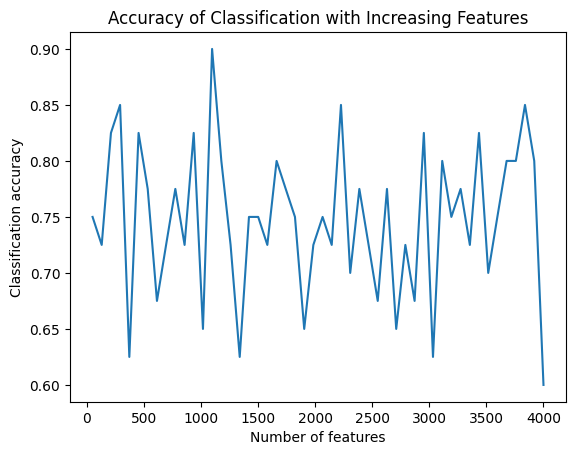

In [19]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title("Accuracy of Classification with Increasing Features")
plt.xlabel("Number of features")
plt.ylabel("Classification accuracy");

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundnant (`n_redundant=0`). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.

---
### Machine Learning Foundation (C) 2020 IBM Corporation
